In [123]:
import matplotlib.pyplot as plt
import numpy as np
import scipy


Modelo Ising 1D

In [124]:
#Definimos parametros

J = 1
nEspines = 100
kBT = 1

#Iniciamos el arreglo de entradas
arregloEspines = np.ones(nEspines)
arregloEspines = arregloEspines * 1/2
estados = arregloEspines
estados  = np.concatenate(([estados],[arregloEspines]), axis=0)



In [125]:
def calculoDeEnergia(arregloEspines):
    energiaVector = 0
    for i in range(arregloEspines.size-1):
        if i == arregloEspines.size-1:
            energiaVector += arregloEspines[i] * arregloEspines[0]
        else:
            energiaVector += arregloEspines[i] * arregloEspines[i+1]

    return -J    * energiaVector


def cambioEspin():
    espin = np.random.randint(low = 0, high = nEspines-1)
    return espin


def calculoDeltaE():
    estado1 = estados[-1]
    estado2 = estados[-1]
    espinAleatorio = cambioEspin()
    estado2[espinAleatorio] =  estado2[espinAleatorio] * -1
    energia1 = calculoDeEnergia(estado1)
    energia2 = calculoDeEnergia(estado2)
    deltaE = energia2 - energia1
    return deltaE, estado2, estado1


#Algoritmo Metropolis
def nuevoEstado():
    global estados
    deltaE, estadoPosible, estadoViejo = calculoDeltaE()
    if deltaE >= 0:
        estados = np.concatenate((estados, [estadoPosible]), axis=0)
    elif metropolisAuxiliar(deltaE):
        estados = np.concatenate((estados, [estadoPosible]), axis=0)
    else:
        estados = np.concatenate((estados, [estadoViejo]), axis=0)


def metropolisAuxiliar(deltaE):
    numeroAleatorio = np.random.random()
    R = np.exp(-deltaE / kBT)
    if numeroAleatorio <= R:
        return True
    else:
        return False

def graficarPasos(numeroPasos):
    for i in range(numeroPasos):
        nuevoEstado()
    fig, ax = plt.subplots(dpi = 100)
    ax.matshow(np.transpose(estados))
    fig.set_figwidth(9)
    fig.set_figheight(15)
    plt.show()

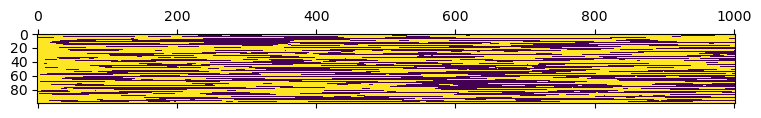

In [126]:
graficarPasos(1000)